In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# Read in the Data

declare columns names

In [2]:
column_names = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country', "target"]

In [3]:
adultDF = pd.read_csv('./data/adult.data', index_col=False, names=column_names)

## Clean the Data

In [4]:
adultDF = strip_spaces(adultDF)

stripped leading/trailing spaces from all cells of string type


In [5]:
columns_with_placeholders = ['workclass', 'occupation', 'native-country']
adultDF = replace_column_w_nan(adultDF,columns_with_placeholders, "?")

Replaced ? values from these columns:['workclass', 'occupation', 'native-country']


Because of the results of our EDA, we will be able to drop missing rows: 
- The workclass column is missing 5.6% of rows
- The occupation column is missing 5.7% of rows
- The native-country column is missing 1.8% of rows

In [6]:
adultDF = drop_na_rows(adultDF, columns_with_placeholders)

Removed NA rows from these columns:['workclass', 'occupation', 'native-country'].


In [7]:
adultDF = adultDF.drop_duplicates()
check_duplicates(adultDF)

You're all clear of duplicates


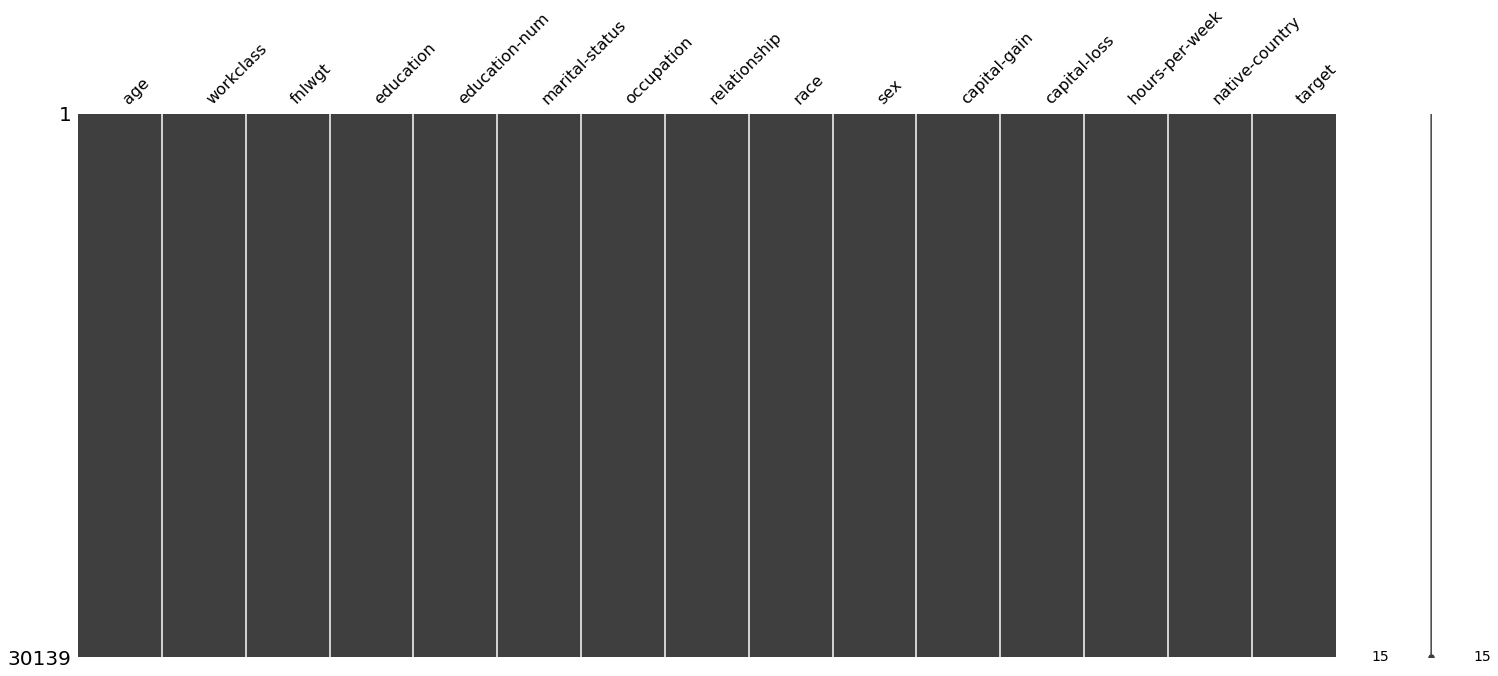

In [8]:
msno.matrix(adultDF)

At this point, we have stripped all white spaces, removed 24 duplicates, replaced '?' values with NaNs, and finally dropped rows with missing values.

We don't see a need to drop any columns for cleaned data - we'll leave that for the model notebook to determine which columns are relevant or not. 

We can however, explore the distribution of the data for outliers and such.

In [16]:
adultDF.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,29991.000000,2.999100e+04,29991.000000,29991.000000,29991.000000,29991.000000,27775.000000
mean,38.403554,1.897777e+05,10.108399,604.757727,88.876363,40.888700,0.249361
std,13.131274,1.056723e+05,2.541005,2579.054141,405.394135,11.958376,0.432651
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376140e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000,1.000000


In [15]:
adultDF = adultDF[adultDF['capital-gain'] != 99999]

## We will change target to be a binary column

In [11]:
adultDF.target.value_counts()

<=50K    22633
>50K      7506
Name: target, dtype: int64

In [12]:
adultDF.target = pd.Series(np.where(adultDF.target.values == '>50K', 1, 0))

#### We have an imbalanced class problem below

In [28]:
adultDF.target.value_counts(normalize=True)

0.0    0.750639
1.0    0.249361
Name: target, dtype: float64

# Train_Test_Split Data

### We are going to dummify our categorical columns in the dataframe

In [14]:
categorical_columns = ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'marital-status', 'native-country']

In [17]:
dummy_df = pd.get_dummies(adultDF,columns=categorical_columns)

In [31]:
y.unique()

array([ 0.,  1., nan])

In [29]:
X = dummy_df[dummy_df != dummy_df.target]
y = dummy_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40,stratify=y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').